In [1]:
import jaxley as jx
import jax.numpy as jnp
import numpy as np

cell = jx.read_swc("morphology/ball-and-stick.swc", ncomp=1, assign_groups=True)
# branch = jx.Branch()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
cell[5].set_ncomp(50)

In [8]:
cell.nodes[cell.nodes['local_branch_index'] == 5]

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,soma,basal,apical,custom,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
5,0,5,0,6.0,7.599998,5000.0,1.0,-70.0,False,False,True,False,0,5,5,0
6,0,5,1,6.0,2.800000,5000.0,1.0,-70.0,False,False,True,False,0,5,6,0
7,0,5,2,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,7,0
8,0,5,3,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,8,0
9,0,5,4,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,9,0
10,0,5,5,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,10,0
11,0,5,6,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,11,0
12,0,5,7,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,12,0
13,0,5,8,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,13,0
14,0,5,9,6.0,2.000000,5000.0,1.0,-70.0,False,False,True,False,0,5,14,0


In [3]:
branch.set('length', 20)
branch.set('radius', 10)
branch.set('axial_resistivity', 100)

In [4]:
branch.at(0.5)

TypeError: 'NoneType' object is not callable

In [3]:
branch.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,20.0,10.0,100.0,1.0,-70.0,0,0,0,0


In [4]:
duration = 1000
dt = 0.025

In [6]:
current = jx.step_current(i_delay=100, i_dur=800, i_amp=0.1, delta_t=dt, t_max=duration)
branch.loc(0.5).stimulate(current)

Added 1 external_states. See `.externals` for details.


In [7]:
branch.loc(0.5).record('v')

Added 1 recordings. See `.recordings` for details.


In [9]:
vs = jnp.squeeze(
            jx.integrate(
                module=branch, 
                params=[],
                param_state=None,
                voltage_solver='jax.sparse',
                delta_t=dt,
                t_max=duration
            ).block_until_ready()
        )
t = np.arange(0, duration + 2*dt, dt)[:-1]

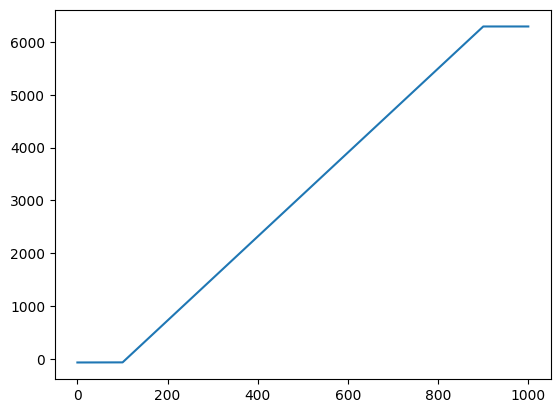

In [10]:
import matplotlib.pyplot as plt
plt.plot(t, vs)